<a href="https://colab.research.google.com/github/DyllanSchuster/Project_2_Fed_Fund_Target_Predictive_Modeling/blob/main/Predict_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: Import libraries
import pandas as pd
from prophet import Prophet
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from ta.momentum import RSIIndicator
from ta.trend import MACD
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
def calculate_rsi(close, window=14):
    return RSIIndicator(close, window=window).rsi()

def calculate_macd(close):
    macd = MACD(close)
    return macd.macd()

In [ ]:
# Cell 2: Load and preprocess data
import pandas as pd

import pandas as pd

# Ask the user for the CSV file name
file_name = input("Enter the name of the CSV file you want to use: ")

# Load the CSV file
df = pd.read_csv(file_name)
df = df.sort_values('Date').reset_index(drop=True)
df['daily_return'] = df['Close'].pct_change()
df['target'] = (df['Close'] > df['Close'].shift(1)).astype(int)
df['Open-Close'] = df['Open'] - df['Close']
df['High-Low'] = df['High'] - df['Low']
df['Volume_change'] = df['Volume'].pct_change()
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()
df['RSI'] = calculate_rsi(df['Close'], window=14)
df['MACD'] = calculate_macd(df['Close'])
df = df.dropna()

Enter the name of the CSV file you want to use: BTC-USD (3).csv


<ipython-input-39-e74cbfc6be1c>:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['daily_return'] = df['Close'].pct_change()
<ipython-input-39-e74cbfc6be1c>:16: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Volume_change'] = df['Volume'].pct_change()


In [ ]:
# Cell 3: Prepare features and split data
features = ['Open-Close', 'High-Low', 'Volume_change', 'MA5', 'MA10', 'MA20', 'daily_return', 'RSI', 'MACD']
X = df[features]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Cell 4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Cell 5: Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [ ]:
# Cell 6: Evaluate model
y_pred_train = rf_model.predict(X_train_scaled)
y_pred_test = rf_model.predict(X_test_scaled)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

Train Accuracy: 1.0
Test Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        61

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



In [ ]:
# Cell 7: Make predictions and prepare results
X_scaled = scaler.transform(X)
y_pred = rf_model.predict(X_scaled)
results_df = pd.DataFrame({
    'Date': df['Date'],
    'Close': df['Close'],
    'Prediction': y_pred
})

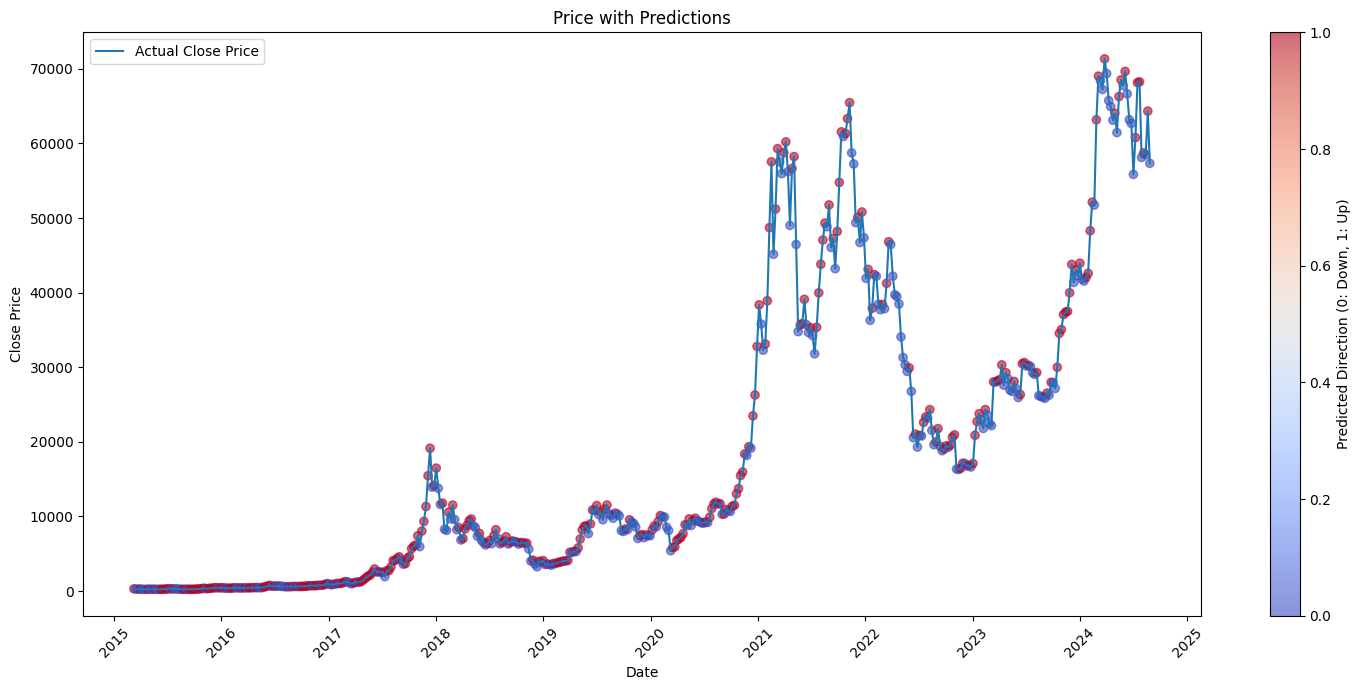

In [ ]:
# Cell 8: Plot results
plt.figure(figsize=(15, 7))
plt.plot(results_df['Date'], results_df['Close'], label='Actual Close Price')
plt.scatter(results_df['Date'], results_df['Close'], c=results_df['Prediction'], cmap='coolwarm', alpha=0.6)
plt.title('Price with Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.colorbar(label='Predicted Direction (0: Down, 1: Up)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Cell 9: Predict next day's movement
last_data_point = X.iloc[-1].values.reshape(1, -1)
last_data_point_scaled = scaler.transform(last_data_point)
next_day_prediction = rf_model.predict(last_data_point_scaled)
print(f"Prediction for next day: {'Up' if next_day_prediction[0] == 1 else 'Down'}")

Prediction for next day: Down


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Feature Importance:
         feature  importance
0     Open-Close    0.535491
6   daily_return    0.409740
7            RSI    0.024971
2  Volume_change    0.011810
4           MA10    0.003885
5           MA20    0.003773
8           MACD    0.003657
3            MA5    0.003363
1       High-Low    0.003310


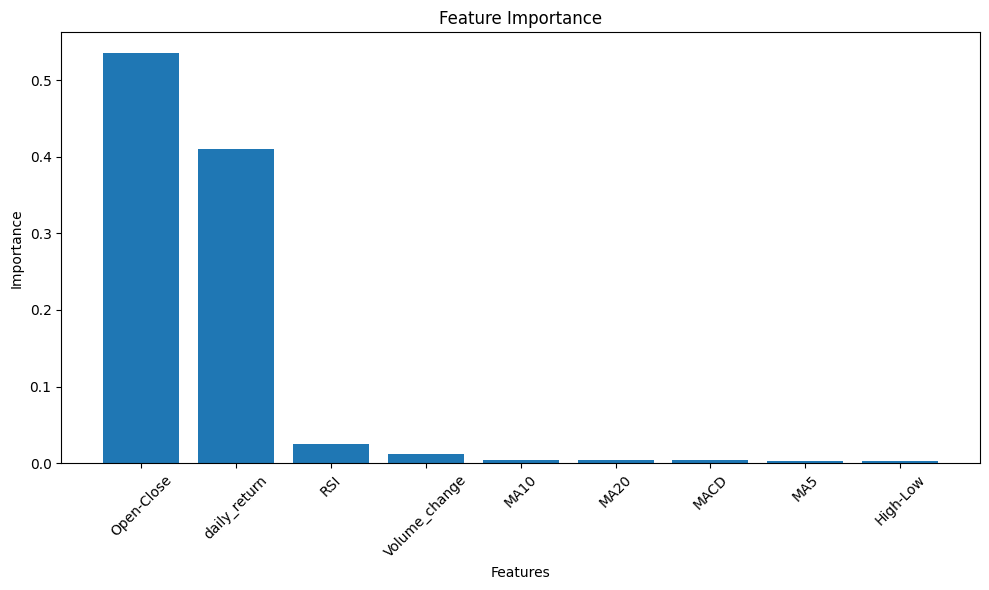

In [ ]:
# Cell 10: Feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

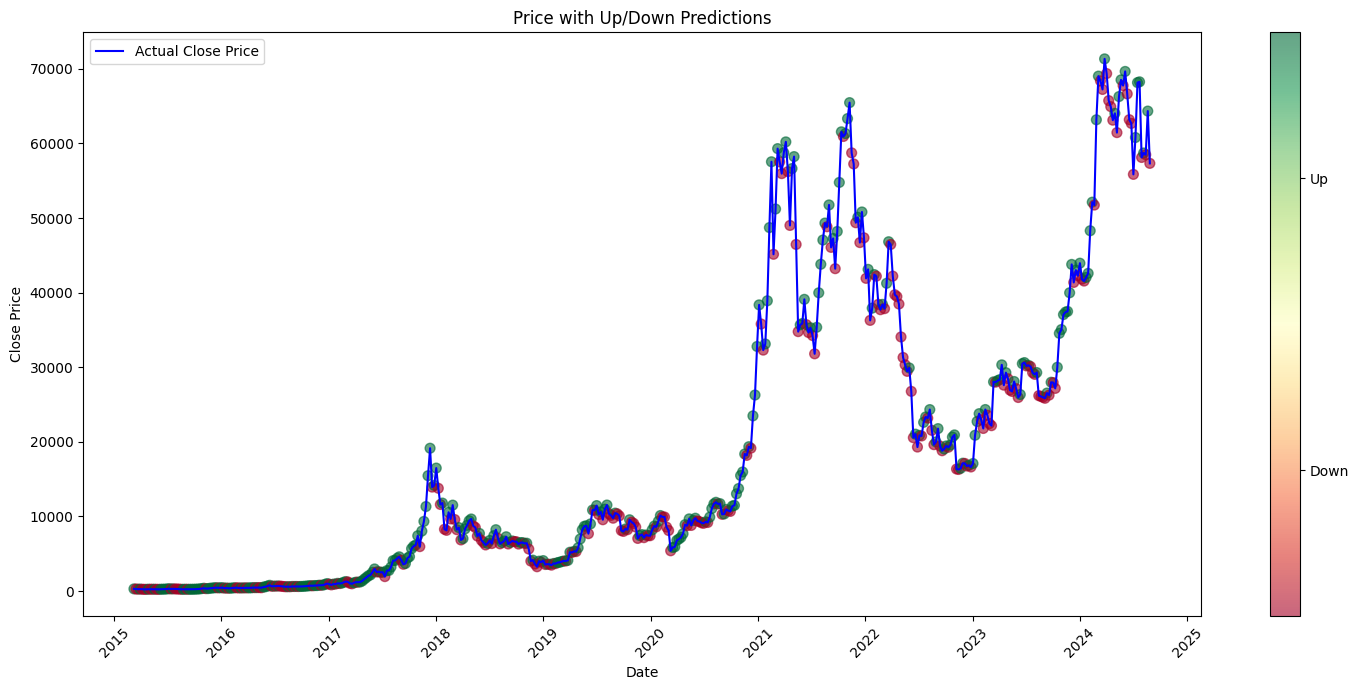

In [ ]:
# Cell 11: Plot prediction graph
plt.figure(figsize=(15, 7))
plt.plot(results_df['Date'], results_df['Close'], label='Actual Close Price', color='blue')
plt.scatter(results_df['Date'], results_df['Close'], c=results_df['Prediction'], cmap='RdYlGn', alpha=0.6, s=50)
plt.title('Price with Up/Down Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
cbar = plt.colorbar()
cbar.set_ticks([0.25, 0.75])
cbar.set_ticklabels(['Down', 'Up'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Cell 7: Make predictions and prepare results
X_scaled = scaler.transform(X)
y_pred = rf_model.predict(X_scaled)
results_df = pd.DataFrame({
    'Date': df['Date'],
    'Close': df['Close'],
    'Prediction': y_pred
})

# Convert 'Date' to datetime and format it
results_df['Date'] = pd.to_datetime(results_df['Date'])
results_df['Formatted_Date'] = results_df['Date'].dt.strftime('%m/%d/%y')

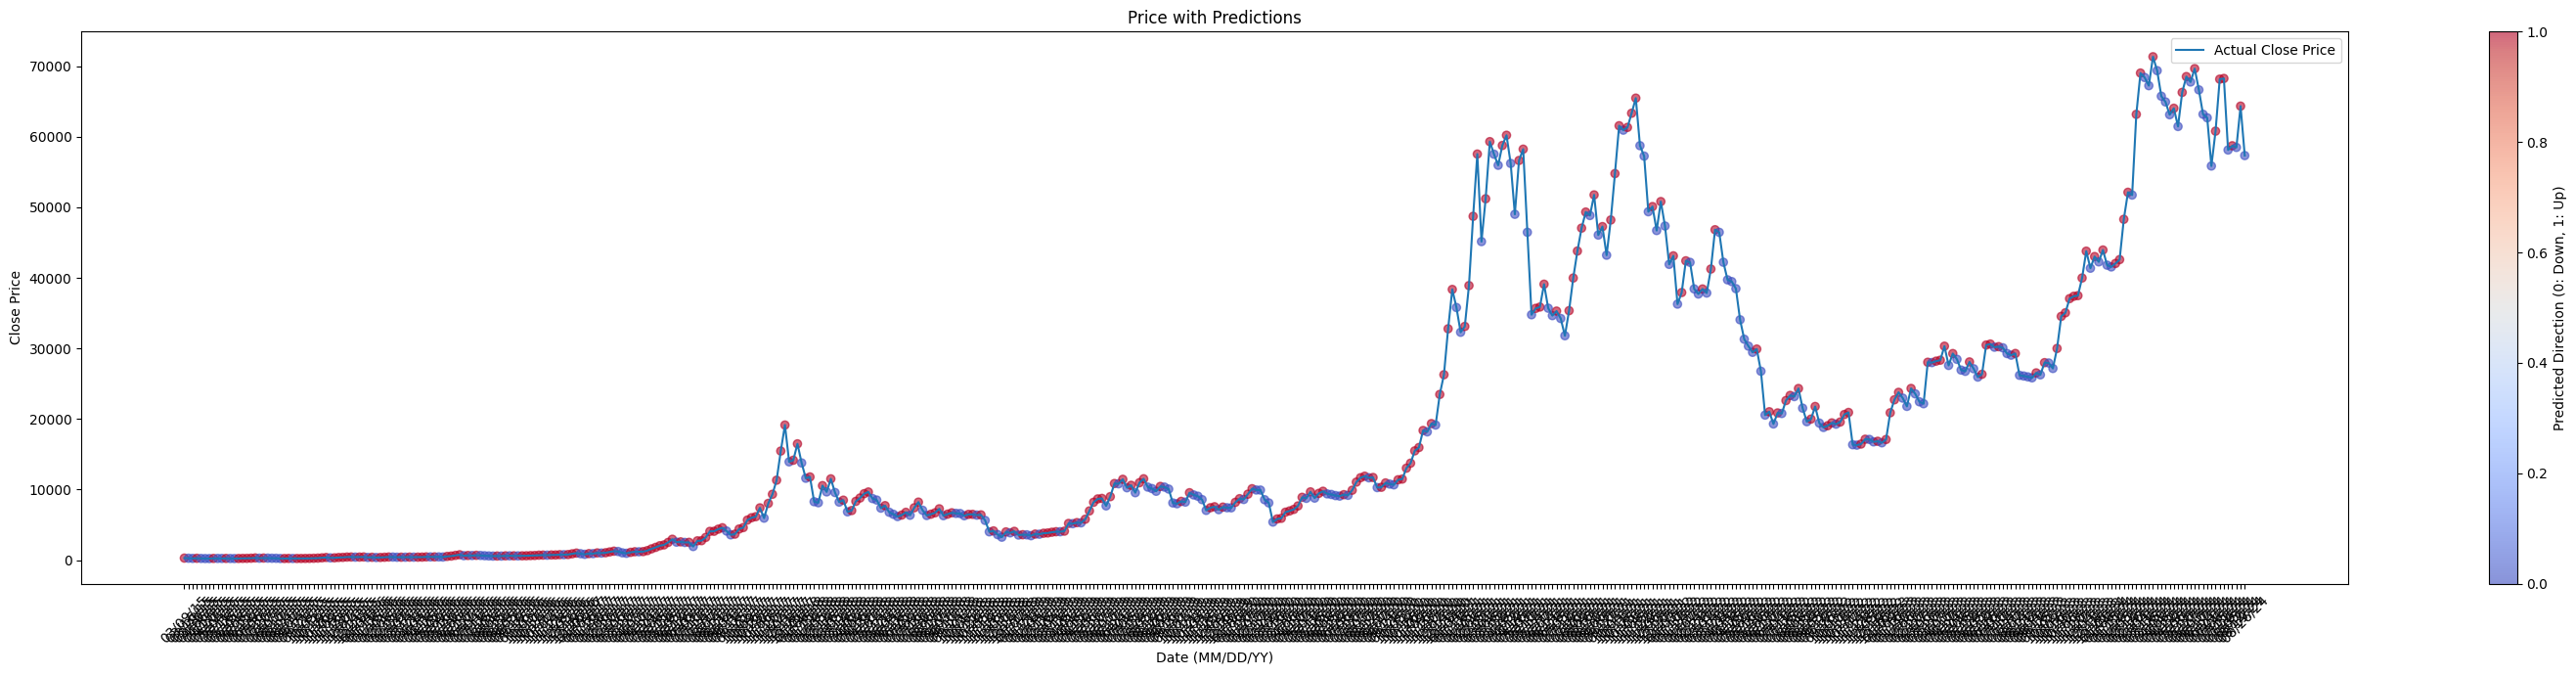

In [ ]:
# Cell 8: Plot results
plt.figure(figsize=(30, 7))
plt.plot(results_df['Formatted_Date'], results_df['Close'], label='Actual Close Price')
plt.scatter(results_df['Formatted_Date'], results_df['Close'], c=results_df['Prediction'], cmap='coolwarm', alpha=0.6)
plt.title('Price with Predictions')
plt.xlabel('Date (MM/DD/YY)')
plt.ylabel('Close Price')
plt.legend()
plt.colorbar(label='Predicted Direction (0: Down, 1: Up)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Cell 9: Predict next day's movement
last_data_point = X.iloc[-1].values.reshape(1, -1)
last_data_point_scaled = scaler.transform(last_data_point)
next_day_prediction = rf_model.predict(last_data_point_scaled)

print(f"Prediction for next day: {'Up' if next_day_prediction[0] == 1 else 'Down'}")

Prediction for next day: Down


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Assuming results_df is your existing DataFrame
prophet_df = results_df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})


In [ ]:
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpggqlw_dw/5t9s7w3k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpggqlw_dw/b6rz20d8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67693', 'data', 'file=/tmp/tmpggqlw_dw/5t9s7w3k.json', 'init=/tmp/tmpggqlw_dw/b6rz20d8.json', 'output', 'file=/tmp/tmpggqlw_dw/prophet_model8_evvw5h/prophet_model-20240907020006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = model.make_future_dataframe(periods=7)  # 7 days for next week
forecast = model.predict(future_dates)

In [ ]:
last_known_price = prophet_df['y'].iloc[-1]
next_week_prediction = forecast['yhat'].iloc[-1]

if next_week_prediction > last_known_price:
    prediction = "Up"
else:
    prediction = "Down"

print(f"The model predicts the price will go {prediction} next week.")


The model predicts the price will go Down next week.


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 3000x700 with 0 Axes>

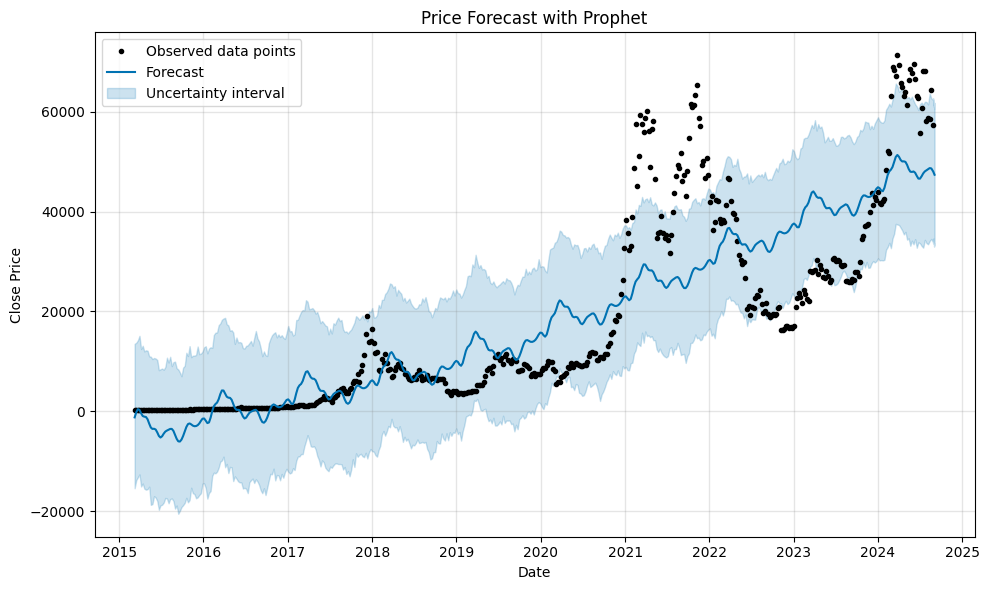

In [ ]:
plt.figure(figsize=(30, 7))
model.plot(forecast)
plt.title('Price Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Prepare data for Prophet
prophet_df = results_df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a DataFrame for the next day
future = model.make_future_dataframe(periods=1)

# Make prediction
forecast = model.predict(future)

# Get the last known price and the predicted price
last_known_price = prophet_df['y'].iloc[-1]
next_day_prediction = forecast['yhat'].iloc[-1]

# Determine if the prediction is Up or Down
prediction = 'Up' if next_day_prediction > last_known_price else 'Down'

print(f"Prediction for next week: {prediction}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpggqlw_dw/ihpi54c3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpggqlw_dw/g3iy1eem.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71384', 'data', 'file=/tmp/tmpggqlw_dw/ihpi54c3.json', 'init=/tmp/tmpggqlw_dw/g3iy1eem.json', 'output', 'file=/tmp/tmpggqlw_dw/prophet_modelc94pif2s/prophet_model-20240907020019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prediction for next week: Down


In [ ]:
# Prepare data for Prophet
prophet_df = results_df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a DataFrame for the next week
future = model.make_future_dataframe(periods=7)

# Make predictions
forecast = model.predict(future)

# Get the last known price
last_known_price = prophet_df['y'].iloc[-1]

# Analyze each day of the next week
for i in range(-7, 0):
    date = forecast['ds'].iloc[i].strftime('%Y-%m-%d')
    predicted_price = forecast['yhat'].iloc[i]
    previous_price = last_known_price if i == -7 else forecast['yhat'].iloc[i-1]
    direction = 'Up' if predicted_price > previous_price else 'Down'

    print(f"Prediction for {date}: {direction}")

    last_known_price = predicted_price

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpggqlw_dw/izsy93vw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpggqlw_dw/hignep6s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69020', 'data', 'file=/tmp/tmpggqlw_dw/izsy93vw.json', 'init=/tmp/tmpggqlw_dw/hignep6s.json', 'output', 'file=/tmp/tmpggqlw_dw/prophet_modeltu_jl4s3/prophet_model-20240907020023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prediction for 2024-08-27: Down
Prediction for 2024-08-28: Down
Prediction for 2024-08-29: Down
Prediction for 2024-08-30: Down
Prediction for 2024-08-31: Down
Prediction for 2024-09-01: Down
Prediction for 2024-09-02: Down


In [ ]:
# Create 'Actual_Direction' column
results_df['Actual_Direction'] = (results_df['Close'] > results_df['Close'].shift(1)).astype(int)

# The first row will be NaN, so we can fill it with 0 or drop it
results_df['Actual_Direction'] = results_df['Actual_Direction'].fillna(0)


In [ ]:
# Assuming you have actual values and predictions
actual = results_df['Actual_Direction']  # You may need to create this column
predicted = results_df['Prediction']

accuracy = accuracy_score(actual, predicted)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00
